In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

np.set_printoptions(legacy='1.25')

import warnings
warnings.filterwarnings('ignore')
from keras_preprocessing import image
from keras.utils import to_categorical
from keras.layers import Dense
from keras import Sequential


In [33]:
classes = os.listdir("images/Train")
classes

['Bulbasaur', 'Charmander', 'Pikachu']

In [34]:
print("Training Data:")
for f in classes:
    path = "images/Train/" + f
    print(f"{f} - {len(os.listdir(path))}")

Training Data:
Bulbasaur - 101
Charmander - 102
Pikachu - 101


In [35]:
print("Test Data:")
for f in classes:
    path = "images/Test/" + f
    print(f"{f} - {len(os.listdir(path))}")

Test Data:
Bulbasaur - 41
Charmander - 42
Pikachu - 40


## Data Loading

In [36]:
# train_data = []   # x
# train_labels = []  # Y

#path = "images/Train/Pikachu/300.jpg"
#img = image.load_img(path, target_size=(100,100))
#img = image.img_to_array(img)
# img.shape
#train_data.append(img)

In [37]:
train_data = []   # x
train_labels = []  # Y

for category in classes:
    folder = f"images/Train/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"

        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

In [38]:
print(len(train_data),len(train_labels))
train_data

304 304


[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 array([[[0., 0., 0.],
         [0., 0.,

## Data Preprocessing

In [39]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [40]:
train_data.shape

(304, 100, 100, 3)

In [41]:
train_labels.shape

(304,)

In [42]:
train_data = train_data.reshape(len(train_data),30000)
train_data.shape

(304, 30000)

In [43]:
category2labels = { 'Pikachu':0,'Charmander':1,'Bulbasaur':2}

label2category = { 0: 'Pikachu',1: 'Charmander',2:'Bulbasaur'}

In [44]:
train_labels = np.array([category2labels[label] for label in train_labels ])

In [45]:
train_labels.shape

(304,)

In [47]:
train_labels = to_categorical(train_labels)
train_labels.shape

(304, 3)

In [ ]:
features = train_data.shape[1]
features

30000

In [58]:
model = Sequential()
model.add(Dense(units=512, activation='relu',input_shape=(features,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=3,  activation='softmax'))

model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=['accuracy'])



In [59]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 512)            │    15,360,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,533,187 (59.25 MB)

 Trainable params: 15,533,187 (59.25 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.fit(train_data, train_labels, batch_size=32, epochs=50)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.3388 - loss: 3706.1694
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.3717 - loss: 2890.6760
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - accuracy: 0.5033 - loss: 889.5392
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.5066 - loss: 1103.0522
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.6086 - loss: 654.3314
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.5724 - loss: 517.5417
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.7368 - loss: 254.0885
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.8289 - loss: 68.4477
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.8289 - loss: 64.8470
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step - accuracy: 0.8618 - loss: 39.2469
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.9178 - loss: 21.7375
Epoch 12/50
10/10 ━━━━━━━━━━━━━

## Test Data and Model Evaluation

In [61]:
test_data = []   # x
test_labels = []  # Y

for category in classes:
    folder = f"images/Test/{category}"
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"

        img = image.load_img(img_path, target_size=(100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)

In [62]:
len(test_data)

123

In [63]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [65]:
test_labels

array(['Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur', 'Bulbasaur',
       'Bulbasaur', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander', 'Charmander',
       'Charmander', 'Charmander', 'Charmander'

In [66]:
test_labels = np.array([category2labels[label] for label in test_labels ])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [67]:
test_data = test_data.reshape(len(test_data),30000)
test_data.shape

(123, 30000)

In [68]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9512 - loss: 19.8937


[19.893714904785156, 0.9512194991111755]

In [74]:
pred=model.predict(test_data).argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [75]:
pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
[label2category[p] for p in pred]

['Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Pikachu',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander'

## Prediction for 1 image

In [91]:
test_img = "images/Test/Charmander/2204.jpg"
img = image.load_img(test_img, target_size=(100,100))
img = image.img_to_array(img)
img.shape

(100, 100, 3)

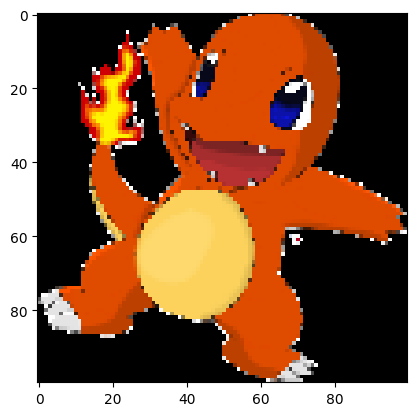

In [92]:
plt.imshow(img.astype('int'))

In [93]:
img = img.reshape(1,30000)
img.shape

(1, 30000)

In [94]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


'Charmander'